# Ridge coefficients as a function of the L2 Regularization
- Ridge 회귀에서 L2 정규화가 모델의 성능에 어떤 영향을 미치는 보여준다.
- L2 정규화는 손실 함수에 페널티 항을 추가하여 계수 $\beta$가 증가함에 따라 페널티 증가

## Purpose of this example

### Creating a non-noisy data set

In [1]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=100, n_features=10, n_informative=8, coef=True, random_state=1
)

# true coefficients를 포함
print(f"The true coefficient of this regression problem are:\n{w}")

The true coefficient of this regression problem are:
[38.32634568 88.49665188  0.         29.75747153  0.         19.08699432
 25.44381023 38.69892343 49.28808734 71.75949622]


### Training the Ridge Regressor

In [2]:
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

# 로그 스케일로 균등하게 분포된 alpha 값들을 생성할 수 있다.
alphas = np.logspace(-3, 4, 200)
coefs = []
errors_coefs = []

# 다른 정규화 강도로 모델을 학습시킬 수 있다.
for a in alphas:
    clf.set_params(alpha=a).fit(X, y)
    coefs.append(clf.coef_)
    errors_coefs.append(mean_squared_error(clf.coef_, w))

### Plotting trained Coefficients and Mean Squared Errors

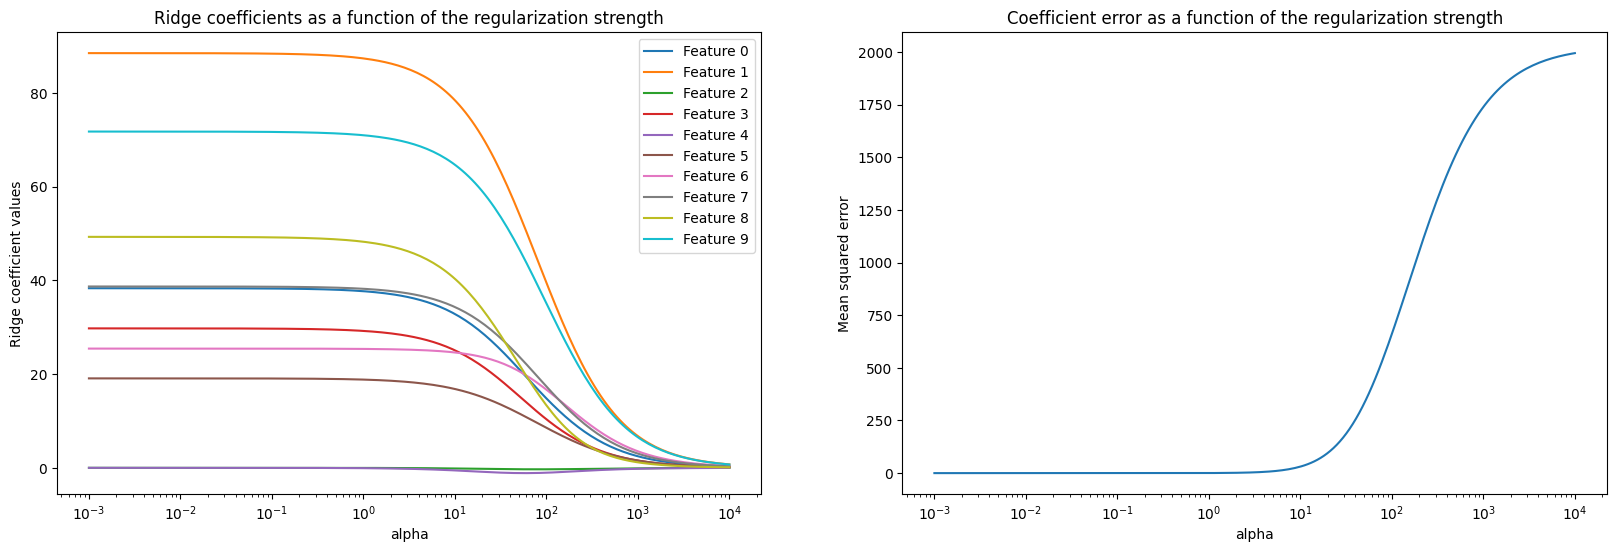

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

alphas = pd.Index(alphas, name="alpha")
coefs = pd.DataFrame(coefs, index=alphas, columns=[f"Feature {i}" for i in range(10)])
errors = pd.Series(errors_coefs, index=alphas, name="Mean squared error")

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

coefs.plot(
    ax=axs[0],
    logx=True,
    title="Ridge coefficients as a function of the regularization strength",
)
axs[0].set_ylabel("Ridge coefficient values")
errors.plot(
    ax=axs[1],
    logx=True,
    title="Coefficient error as a function of the regularization strength",
)
_ = axs[1].set_ylabel("Mean squared error")